## Order of business:

1. __Using yield and print in a function__
2. __Numpy and matrices__ 
3. __Referencing Pandas DataFrames__
4. __Scatter plots__ 
5. __An example using real data__ 
6. __Time for Datacamp__ 


# Using yield and print in a function 
## Yield:

When using yield you basicly create a generator instead of a function. Generators are most comparable to lists, with the main difference that very little memory is used, so all elements of the genereator aren't stored in memory, instead each element is created when it is called upon:

In [1]:
def squared_list(n):
    # Function which returns a list of squared number from 1 to n
    numbers =[]
    for i in range(1,n+1):
        numbers.append(i**2)        
    return numbers
print('List:')
print(squared_list(5))


def squared_generator(n):
    # Function which returns a generator of squared number from 1 to n
    for i in range(1,n+1):
        yield i**2
        

print('Generator loop:')  
for i in squared_generator(5):
    print(i)

List:
[1, 4, 9, 16, 25]
Generator loop:
1
4
9
16
25


In [2]:
# But the counter() itself does not return anything like you would expect from a return-function:
print(squared_list(5))

print(squared_generator(5))

[1, 4, 9, 16, 25]
<generator object squared_generator at 0x10d721e50>


Since most stuf you do with generators can also be done with lists, the main motivation for using them is reducing memory use and therefore increasing speed. This probably won't be that important for you, but understanding how yield works can be helpful for understanding the code of others. <br>
Additionally it is generally easier to create generator using comprehension, so the above example with squared numbers would be:

In [3]:
squared_list_comp = [i**2 for i in range(1,6)] # Square brackets indicates you're comprehending a list
print('List:')
print(squared_list_comp)
print('Generator loop:')
squared_generator_comp = (i**2 for i in range(1,6)) # The round brackets indicates that it is a generator 

for s in squared_generator_comp:
    print(s)

List:
[1, 4, 9, 16, 25]
Generator loop:
1
4
9
16
25


In [4]:
# Extra: if you still want to have a function, such that you can choose the length of the generator,
# an elegant solution, would be to use a lambda function:
sq_gen_lambda = lambda n : (i**2 for i in range(1,n+1))

In [5]:
# you can also customize the things you yield:
def generator():
    yield 1
    yield 'hello'
    yield [1,2,3]

gen_object = generator()

# Instead of looping you can also use the next function, once the generator object is defined
print(next(gen_object))
print(next(gen_object))
print(next(gen_object))


# but beware of errors if you call next more times than there are elements in your generator:
try:
    print(next(gen_object))
except:
    print('Generator is empty')

1
hello
[1, 2, 3]
Generator is empty


## Ending a function with print:

So basicly inside a function, python runs from the top and down, when python reaches a yield or return statement it stops, but if there are no such statement the function simply runs through all the code in the function

In [6]:
def printer_times_two(text):
    print(text)
    text *= 2 #double the text
    print(text)

printer_times_two('Hello')

Hello
HelloHello


So this function simply prints the text, doubles it and then prints it again. Noticably the first print doesn't end the function, it keeps going. <br> Another thing to note is that the function does not 'output' anything, only None (cause there is no output):

In [7]:
output = printer_times_two('Hello')
print('The output of the function is:',output)

Hello
HelloHello
The output of the function is: None


Now if a return statement is used the behavior is different, the function stops immediately and never reaches the second print() statement

In [8]:
def return_times_two(text):
    print(text)
    return text
    # all the code below is never run:
    text *= 2 #double the text
    print(text)

In [9]:
output = return_times_two('Hello')
print('The output of the function is:',output)

Hello
The output of the function is: Hello


We can combine this and our newfound knowledge about yield and next() to create generator printer:

In [10]:
def printer_generator(text):
    print(text)
    yield #The yield statement don't even have to return anything
    text *=2
    print(text)
    yield text

generator = printer_generator('Hello')
text1 = next(generator)

Hello


In [11]:
text2 = next(generator)
print(text1,text2)

HelloHello
None HelloHello


# Numpy and matrices  <br>
## Numpy

In [12]:
import numpy as np #np is a very popular abbreviation for numpy

Numpy arrays, which Jeppe showed you in lecture 3, is the best part of numpy, but numpy can also do a lot of other cool stuf, it contains a wide array of usefull mathematical function and constants. I'll show a glimpse of it here:

In [13]:
print('pi: ',np.pi)
print('The sine (sinus) of pi:',np.sin(np.pi),', which is approximately zero')
print('The cosine (cosinus) of pi:',np.cos(np.pi))
print('Eulers constants (the exponential function): ',np.exp(1))
print('The natural log of e:', np.log(np.exp(1)))

pi:  3.141592653589793
The sine (sinus) of pi: 1.2246467991473532e-16 , which is approximately zero
The cosine (cosinus) of pi: -1.0
Eulers constants (the exponential function):  2.718281828459045
The natural log of e: 1.0


Basically anytime you need a standard mathematical tool, googling: numpy + 'what you need' will likely lead you in the right direction.

Numpy can also create a bunch of statistics from arrays:

In [14]:
# Create two independent arrays of a standard gaussian distribution:
np.random.seed(3)
gauss_one = np.random.normal(loc=0.0, scale=1.0, size=1000)
gauss_two = np.random.normal(loc=0.0, scale=1.0, size=1000)
# Creating random numbers is another thing it can do well, but Jeppe will cover this in lecture 4.



print('The mean: ',np.mean(gauss_one))
print('The variance: ', np.var(gauss_one))
print('The covariance matrix: \n',np.cov(gauss_one,gauss_two,bias=True)) 
# The bias parameter is by default False it determines whether sample mean is calculated by dividing with N or N-1,
# for some reason the default for the covariance matrix is N-1, while it is N for the variance-function

The mean:  0.017284332980834295
The variance:  1.0168743900102124
The covariance matrix: 
 [[1.01687439 0.03468944]
 [0.03468944 1.02317371]]


In [15]:
np.cov(gauss_one,gauss_two,bias=True)[0,1]

0.03468944027857264

Jeppe has made an excellent list of the most important parts of numpy in lecture 3 at point 2.4, in addition to this you can check out the documentation for [Statistics](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html), [Boolean operations](https://docs.scipy.org/doc/numpy/reference/routines.logic.html) and [Universial functions](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs). All these pages are subpages of the [numpy documentation](https://docs.scipy.org/doc/numpy/reference/index.html). <br>
Numpy can also create random numbers which Jeppe will show you in lecture 4, a lot of the possible distriubtions can be found [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html).

## Matrices

Generally, as Jeppe showed in lecture 3 you can write matrices as a multi-dimensional numpy array, for example a two by two matrix:

In [16]:
a=np.array([[2,1],[1,2]])
print('a: \n',a)
b=np.array([[3,4],[1,2]])
print('b:\n',b)
print('Matrix multilpicaton: \n',a@b) # And you can do matrix multiplication
print('Bitwise multiplication: \n',a*b) # Returns bitwise multiplication of each element

a: 
 [[2 1]
 [1 2]]
b:
 [[3 4]
 [1 2]]
Matrix multilpicaton: 
 [[ 7 10]
 [ 5  8]]
Bitwise multiplication: 
 [[6 4]
 [1 4]]


In [17]:
# Here are more examples of array matrices:
three_by_two = np.array([[1,1],[2,2],[3,3]])
two_by_three = np.array([[1,2,3],[4,5,6]])
# So you are inserting a list of lists, each of the lists inside the main list is a row
print(two_by_three)
print(three_by_two)

[[1 2 3]
 [4 5 6]]
[[1 1]
 [2 2]
 [3 3]]


__numpy.matrix__ <br>
It also possible to specifically specify a matrix in the numpy enviornment, for example as _a = np.matrix([[1,2],[3,4]])_. This changes the methods and operators somewhat (for example the operator for matrix multiplication is * instead of @), and most matrix operations like inversing, transposing can be implemented as methods
<br>
However all these functionalities have been replicated in the subpackage numpy.linalg for arrays, so there is no reason to use matrix instead of two-dimensional arrays, as it only means having to learn a new methods and increases the risk of making errors (generally arrays and matrices aren't compatible). Numpy has themselves written in the documentation for numpy.matrix: 
<br>
"_It is no longer recommended to use this class, even for linear algebra. Instead use regular arrays. The class may be removed in the future_"
<br> 
<br> 
__tl;dr:__ Don't use np.matrix, its functionalities has been replaced by numpy.linalg for arrays, and could be removed in the future.
<br>
<br>
__Matrix Operations__
<br>
[Documentation for linalg](https://docs.scipy.org/doc/numpy/reference/routines.linalg.html), contains a list of usefull linar algebra functions for arrays

Numpy can do a lot of matrix operations, here are a few examples:

error

In [18]:
print('We can transpose matrices:')
two_by_three = np.array([[1,2,3],[1,2,3]])
# Four different ways of tranposing a matrix:
print(two_by_three)
print('Transposed:')
print(np.transpose(two_by_three))
print('Alternatively, it can also be applied as a method ')
print(two_by_three.transpose())
print('When using it as a method one can simply write .T for short')
print(two_by_three.T)

We can transpose matrices:
[[1 2 3]
 [1 2 3]]
Transposed:
[[1 1]
 [2 2]
 [3 3]]
Alternatively, it can also be applied as a method 
[[1 1]
 [2 2]
 [3 3]]
When using it as a method one can simply write .T for short
[[1 1]
 [2 2]
 [3 3]]


In [19]:
print('We can find the inverse:')
print(np.linalg.inv(a))
print('Such that a dot the inverse is the identety matrix:')
print(a@np.linalg.inv(a))

We can find the inverse:
[[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
Such that a dot the inverse is the identety matrix:
[[1. 0.]
 [0. 1.]]


In [20]:
print('We can find the det determinant of a:')
print(f'{np.linalg.det(a):.4f}') # :.4f restrains the number of digits to 4 using 'formatted strings' (f'text')

print('We can also solve for eigenvalues and eigenvectors:')
eigvalues, eigvectors = np.linalg.eig(a)
print(f'The eigenvalues of a is: {eigvalues}, so the product '
      f'of the eigenvalues is equal to the determinant of a: {np.prod(eigvalues):.2f}') 
# Notice how a single line is divisioned into two inside the print function simply by wrapping them both with f'text', this is for more readable code.

print(f'\nThe eigenvectors are the columns: \n{eigvectors}')

We can find the det determinant of a:
3.0000
We can also solve for eigenvalues and eigenvectors:
The eigenvalues of a is: [3. 1.], so the product of the eigenvalues is equal to the determinant of a: 3.00

The eigenvectors are the columns: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


We can also see that the formula: $\left(a-\lambda_{i} I\right)v_{i}=\mathbf{0}$ holds, where $\lambda_{i}$ is an eigenvalue, and $v_{i}$ is an eigenvector:

In [21]:
print((a-eigvalues[0]*np.identity(2))@eigvectors[:,0])
# Notice that np.linalg.eig() returns the eigen vectors in the columns of the matrix,
# so eigvectors[:,0] is the first eigenvector, and eigvectors[:,1] is the second.

[0. 0.]


We can also solve linear matrix equations:

In [22]:
x  = np.linalg.solve(a,b) # Returns the solution x to the equation a@x = b
print(f'a@x:\n{a@x} \nis equal to b:\n{b} \n')

a@x:
[[3. 4.]
 [1. 2.]] 
is equal to b:
[[3 4]
 [1 2]] 



In [23]:
print('We can also join arrays:')
print(np.concatenate([a,b]))
print('When they are multidimensional we have to choose on which axis we do this:')
print(np.concatenate([a,b], axis=1))

We can also join arrays:
[[2 1]
 [1 2]
 [3 4]
 [1 2]]
When they are multidimensional we have to choose on which axis we do this:
[[2 1 3 4]
 [1 2 1 2]]


# Referencing Pandas DataFrames

Jeppe won't talk much about DataFrames until lecture 7 and 8 (right before you get to do the dataproject), but since you've been working a lot on it in DataCamp, I think it's fair to show you some stuff. <br>
I think the reason why referencing DataFrames might cause some confusiion is that there are so [many different ways of doing it](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html). <br>
I'll try to give some overview:
<br> 
__First we create some data:__

In [24]:
import pandas as pd

# Generate some data:
df = pd.DataFrame(data = [[1, 1/3 ],[2,1/5],[3,1/10]], columns=['integers','floats'])
df

,integers,floats
0,1,0.333333
1,2,0.200000
2,3,0.100000


In [25]:
# We can add a column with another atomic type:
df['strings']= ['hello','hey there','hello']
df

,integers,floats,strings
0,1,0.333333,hello
1,2,0.200000,hey there
2,3,0.100000,hello


Now I will show you 5 approaches of referecing a DataFrame, the main logic is that you remember that you are looking at a dataset: So which columns you choose is the variable you wanna see (integers, floats or strings). And which rows you wanna look at is typically not done by the index number, the fifth observation of of a dataset is rarely epsecially interesting, instead you generally use conditions, i.e. like "all observations where the income is larger than 100.000", stuf like that.
Some of the different approaches offer different functionalities, but not all of them. Therefore I recomend that you use as few as possible, so you only use a new approach if it offers a new functionality.

In [26]:
# First we create the condition that the string should be equal to 'hello' (so the first and the last observation)
condition = (df['strings']=='hello')
# Here we use the single brackets approach, the .variable-method is also feassible.

# Note that the condition is a boolean pandas series:
print(condition)
print(type(condition))

0     True
1    False
2     True
Name: strings, dtype: bool
<class 'pandas.core.series.Series'>


__Single brackets__

In [27]:
# When knowing the column names we can easily reference using single brackets:
print('Integer column:')
print(df['integers'])
print('\nString column:')
print(df['strings'])

Integer column:
0    1
1    2
2    3
Name: integers, dtype: int64

String column:
0        hello
1    hey there
2        hello
Name: strings, dtype: object


In [28]:
# When referencing only one column with single brackets you can reference the index:
print(df['integers'][0])
# However referencing using a condition is not suported

1


However you should notice that you are not strictly referecing the first element of the series, 
you are instead refercing the element with index=0.
In this case the index is numbered and nicely sorted so the two things are the same,
but an index can be non-ordred or even come in other types (strings). <br>
The method is easily accessible and very good for creating conditions, however you should note that you are returning a series and not a new DataFrame, further, you cannot reference multiple columns.

In [29]:
print(type(df['integers']))

<class 'pandas.core.series.Series'>


__The .variable - method__ <br>
Somewhat similar to the above you can use the following method:

In [30]:
print(type(df.integers))
df.integers

<class 'pandas.core.series.Series'>


0    1
1    2
2    3
Name: integers, dtype: int64

Although slightly easier to write, you cannot add a new variable to your dataset with this approach, and I thus recomend that you use the single brackets instead, so you don't mix them accidentily.

__Double brakcets__:

In [31]:
# We can use double brackets to refer to multiple columns at the same time:
df[['integers','strings']]

,integers,strings
0,1,hello
1,2,hey there
2,3,hello


In [32]:
# Double brackets can also be used on a single column to keep the prety Panda look, 
# because you are still returning a dataframe:
print(type(df[['integers']]))
df[['integers']]

<class 'pandas.core.frame.DataFrame'>


,integers
0,1
1,2
2,3


In [33]:
# However you cannot reference the index when using double brackets columns nor can you reference using conditions:
try:
    print(df[['integers']][0])
except:
    print('It cannot be done')


It cannot be done


A more general approach would be the .loc-method:

__.loc-method__ <br>
Generally you will use the _.loc[CONDITION, [VARLIST]]_ method to show or extract parts of you data, as it is the most versatile, so this is probably the most important to understand. <br> 
The CONDITION is a series of True/False values indicating which rows to pick and the VARLIST is simply the list of columns to include.

In [34]:
df.loc[condition,:] # the ':' signals all columns

,integers,floats,strings
0,1,0.333333,hello
2,3,0.100000,hello


In [35]:
# You can also choose a single or multiple columns:
df.loc[:,['integers','strings']]

,integers,strings
0,1,hello
1,2,hey there
2,3,hello


In [36]:
df.loc[:,['strings']]

,strings
0,hello
1,hey there
2,hello


In [37]:
# If you only want one approach I would recomend this at it also possible to output a pandas series:
print(type(df.loc[:,'strings']))
df.loc[:,'strings']

<class 'pandas.core.series.Series'>


0        hello
1    hey there
2        hello
Name: strings, dtype: object

In [38]:
# nomally the condtion is written directly into the .loc method:
df.loc[df.loc[:,'integers']>1,['integers','floats']]

,integers,floats
1,2,0.2
2,3,0.1


__.iloc-method__

If you do wanna select rows by choosing index, one approach would be the iloc method, which is basicly .loc but with index instead of conditions, you can read more about that [here](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/). <br>
There is also something called the .ix-method but as noted in the above link, this is deprecated.

In [39]:
df.iloc[[0,1],:]

,integers,floats,strings
0,1,0.333333,hello
1,2,0.200000,hey there


# Scatter plots

There was a question about a specific 'intermediate python' DataCamp exercise, where a scatterplot is made and the size of each dot represents the population size of the country. In this exercise the array which contains the population is doubled and the question was why, the simple reason for this is that the size of each element of the array decideds the size of each dot, thus doubling it makes the dot larger (although not twice as large, the reason for which can found [here](https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size)).

In [40]:
import matplotlib.pyplot as plt

# Create some simple data:
x_axis = [1,2,3,4]
y_axis = [1,2,3,4]
sizes = [100,500,1000,1500] # These numbers determine the size of each dot

# plot data:
plt.scatter(x_axis, y_axis, s=sizes)

plt.show()

<Figure size 640x480 with 1 Axes>

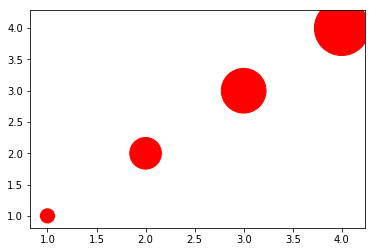

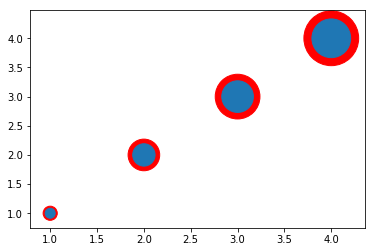

In [41]:
# Double each element of the list:
sizes2 = [size*2 for size in sizes]


plt.scatter(x_axis, y_axis, s=sizes2, c='red')

plt.show()

plt.scatter(x_axis, y_axis, s=sizes2, c='red')

plt.scatter(x_axis, y_axis, s=sizes)

plt.show()

In [42]:
# doubling a list:
sizes2 = [size*2 for size in sizes]
print(sizes2)
# list *2:
sizes_times_2 = sizes*2
print(sizes_times_2)
# Not what we want, but if we do it on a array we get the wanted result:

sizes_np = np.array(sizes)
sizes2_np = sizes_np*2 #numpy arrays suports bitwise operations
print(sizes2_np)

[200, 1000, 2000, 3000]
[100, 500, 1000, 1500, 100, 500, 1000, 1500]
[ 200 1000 2000 3000]


# An example using real data

I wrote this to give you an real example of where it might be useful, but after writing it I realized that it might be a bit to complex for the level that you're expected to be at right now. I still provide it so you can look at if you have time, and I have done quite a bit of commenting to make it more readable, but we will glans over the complex stuff in class. <br>
Maybe it will be benificial to revisit this after lecture 8 and before your dataproject.

In [43]:
'''
Importing data directly from Statistics Denmark requires the pydst package, 
which Jeppe will introduce in lecture 8, so don't worry about this yet, 
but after the lecture and before you come back and get some inspiration for your Data project
Because there is a lot of data this block can take a little time
You need to run pip install git+https://github.com/elben10/pydst in your anaconda prompt (terminal) the first time 
as you need to download the pydst package
'''

import pydst
Dst = pydst.Dst(lang='en')


##  Preliminary stuf
# We want a list of all muncipalities in Denmark so we can tell Denmarks statistics (DST) what we want
# Each muncipality has an 'text' which is the name of the muncipality like 'Copenhagen' and an id which is simply an identification number
muncipalities_dicts = Dst.get_variables(table_id = 'BY2')['values'][0] #This comand extrats the list of muncipalities we want
muncipalities_dicts.remove({'id': '411', 'text': 'Christiansø'})  # remove chistiansø as it is not included in the dataset for income
munci_dict = {m['id'] : m['text'] for m in muncipalities_dicts} # This comand reformats the list into one dictionary (DST spits out a list of dictionaries))

# These comands have to be either printed or run as the last step in the block to actually be shown:
Dst.get_variables(table_id='BY2') # This command shows possible variables to load from the 'BY2' (population data) table, all tables can found at: https://www.statistikbanken.dk
Dst.get_variables(table_id='BY2')['values'][0] # Here I am looking at the possible values the first variable KOMK can take, this is the muncipalities
Dst.get_variables(table_id='INDKP101') # Now looking at variables in the INDKP101 table, which shows income data
Dst.get_variables(table_id='INDKP101')['values'][3]


##  Now its time to actually load the data for population:
pop_data = Dst.get_data(table_id = 'BY2', variables={'KOMK': munci_dict.keys(), 'Tid':['2018'], 'ALDER': [str(i) for i in range(18,66)], 'KØN': ['*'] , 'BYST':['*']}) # Load data of total population
pop_sum = pop_data.groupby('KOMK').sum()
# The data is loaded with a datapoint of number of people for each unique combination of muncipality-age-gender so the above line simple sums this for each muncipality
#pop_sum.index.rename('OMRÅDE', inplace=True) # Then we rename the index (which is the muncipalities) so it fits with the income data
pop_sum.drop('TID', axis=1, inplace=True) # Drop the variable indicating year, as all observations are from 2018.
pop_sum.rename(columns={'INDHOLD':'population'},inplace=True) # Rename for clarity which variable indicates population size

# And some income data
inc_data_long = Dst.get_data(table_id = 'INDKP101', variables={'OMRÅDE': munci_dict.keys(), 'ENHED':['121'],'KOEN':['mok'], 'Tid':['2018'],'INDKOMSTTYPE':['115','120']})

print(f'The data is loaded as dataframes: {type(inc_data_long)}')

The data is loaded as dataframes: <class 'pandas.core.frame.DataFrame'>


In [44]:
# The income data is loaded in long-format so we reshape it to wide format:
inc_data = inc_data_long.pivot(index='OMRÅDE', columns='INDKOMSTTYPE', values='INDHOLD')

In [45]:
# use .head() -method on dataframe to look quickly at data:
inc_data.head()

INDKOMSTTYPE,"4 Wages and salaries etc., total","5 Entrepreneurial income, total"
OMRÅDE,,
Aabenraa,299302,149201
Aalborg,300905,162712
Aarhus,301001,259992
Albertslund,300101,167649
Allerød,438230,188987


In [46]:
pop_sum.head()

,population
KOMK,
Aabenraa,34545
Aalborg,138900
Aarhus,231291
Albertslund,16916
Allerød,14218


In [47]:
#Rename the variable names:
inc_data.rename(columns={'4 Wages and salaries etc., total':'wage_inc', '5 Entrepreneurial income, total':'ent_inc'},inplace=True) 

# Now we merge on the index (which in this case is the muncipality)
data = pd.merge(inc_data, pop_sum,left_index=True, right_index=True)
data.head()

,wage_inc,ent_inc,population
OMRÅDE,,,
Aabenraa,299302,149201,34545
Aalborg,300905,162712,138900
Aarhus,301001,259992,231291
Albertslund,300101,167649,16916
Allerød,438230,188987,14218


Now we have the wanted data, in order to distinguish each observation we create some random color codes, so each muncipality has a different color.

In [48]:
nobs = len(data.index) # number of observations

random = np.random.rand(nobs,3) # nobs lists with three random numbers between zero and one

colormap = [(i,j,k,0.5) for i,j,k in random] 
#Among other things matplotlib understands hex color codes which are the first three entries i,j,k (our random numbers),
# The last intry 0.5 is tranparency of the colors

# This is the first five entries:
colormap[:5]

[(0.5520684117244246, 0.928290392994412, 0.9008996036016469, 0.5),
 (0.6640805665497589, 0.6740669917722055, 0.7087869331432487, 0.5),
 (0.01404727205909595, 0.04797447741564553, 0.6775945516730147, 0.5),
 (0.5345352450593157, 0.8319051481600264, 0.27622205000271804, 0.5),
 (0.5781958810985663, 0.4617029476559089, 0.7247924077407706, 0.5)]

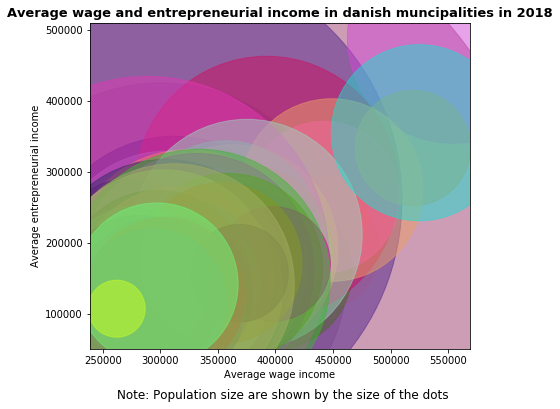

In [49]:
# Now we plot:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,2,1)

ax.scatter(data['wage_inc'],data['ent_inc'], s=data['population'], c=colormap)

# formating:
ax.set_title('Average wage and entrepreneurial income in danish muncipalities in 2018',fontdict={'fontsize':13,'fontweight':"bold"})
ax.set_xlabel('Average wage income')
ax.set_ylabel('Average entrepreneurial income')
plt.figtext(0.15, 0.01, "Note: Population size are shown by the size of the dots", wrap=True, fontsize=12)

# Show plot
plt.show()

Looks a bit more like abstract expressionism than what we were looking for. <br>
This is because the population size makes the dots way to big, therefore we need to rescale them:

In [50]:
data['populations_rescaled']=data['population']/20 #Pandas also surports bit-wise operations

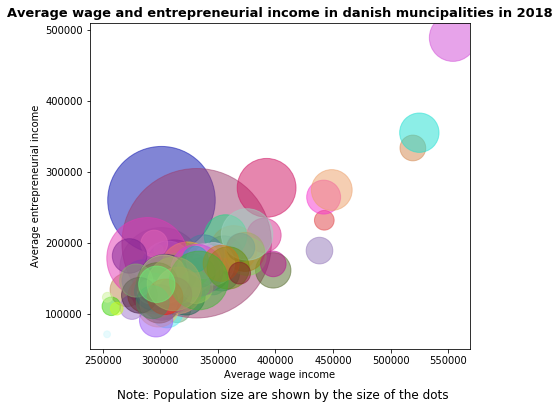

In [51]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,2,1)
ax.scatter(data['wage_inc'],data['ent_inc'], s=data['populations_rescaled'], c=colormap)

ax.set_title('Average wage and entrepreneurial income in danish muncipalities in 2018',fontdict={'fontsize':13,'fontweight':"bold"})
ax.set_xlabel('Average wage income')
ax.set_ylabel('Average entrepreneurial income')

plt.figtext(0.15, 0.01, "Note: Population size are shown by the size of the dots", wrap=True, fontsize=12)
plt.show()

# Time for Datacamp

Remember the deadline is this sunday, the 23rd
If you have already finished them, I suggest the following:
1. Look through Jeppes lecture notes, especially lecture note 3, as that is the main focus of the problem set
2. Read through problemset 1 and think about possible approaches to the problems and where in the lecture notes you have seen something similar. The problemset also includes a short introduction one how to approach the problemset in terms of balancing how much you look at the answers (which are included in the probem set)
3. If you're eager to start doing some problems and already feel comfortable in python, you could visit [project_euler](https://projecteuler.net/), which is a website filled with mathematical orriented programming problems. They have varying degrees of difficulty (some of them are really hard) but help can be found online for the first couple of problems or you can ask me.